In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pingouin
from statsmodels.stats.multicomp import pairwise_tukeyhsd
sns.set_style('darkgrid')

## Подготовка данных

In [2]:
df = pd.read_csv('AB_lesson4.csv')

In [3]:
df.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30000 non-null  int64 
 1   group   30000 non-null  object
 2   events  30000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 703.3+ KB


In [5]:
df.describe()

,id,events
count,30000.000000,30000.000000
mean,14999.500000,31.554500
std,8660.398374,10.878761
min,0.000000,-7.000000
25%,7499.750000,24.000000
50%,14999.500000,31.000000
75%,22499.250000,39.000000
max,29999.000000,75.000000


In [6]:
df.group.value_counts()

group
A    10000
B    10000
C    10000
Name: count, dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
group_A = df[df['group'] == 'A']
group_B = df[df['group'] == 'B']
group_C = df[df['group'] == 'C']

## Проверка на гомоскедастичность

Применим тест Левена:

$H_{0}$: Дисперсии внутри экспериментальных групп одинаковы

$H_{1}$: Дисперсии внутри экспериментальных групп отличаются

In [9]:
st.levene(group_A.events, group_B.events, group_C.events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

На уровне значимости 0.05 **не отвергаем** нулевую гипотезу о **равенсте** дисперсий

## Проверка на нормальность

Визуально оценим график распределения по каждой группе:

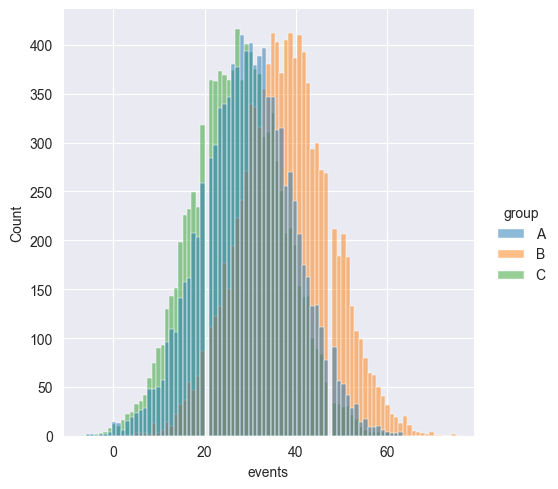

In [10]:
sns.displot(data=df, x='events', hue='group')

Также воспользуемся тестом Агостино-Пирсона:

In [11]:
print([st.normaltest(group, nan_policy='omit').pvalue for group in (group_A.events, group_B.events, group_C.events)])

[0.3493328906085719, 0.6566948749848232, 0.19753037588314626]


На уровне значимости 0.05 **не отвергаем** нулевую гипотезу о **нормальности** распределения по каждой группе

Сравним полученные результаты с QQ-plot:

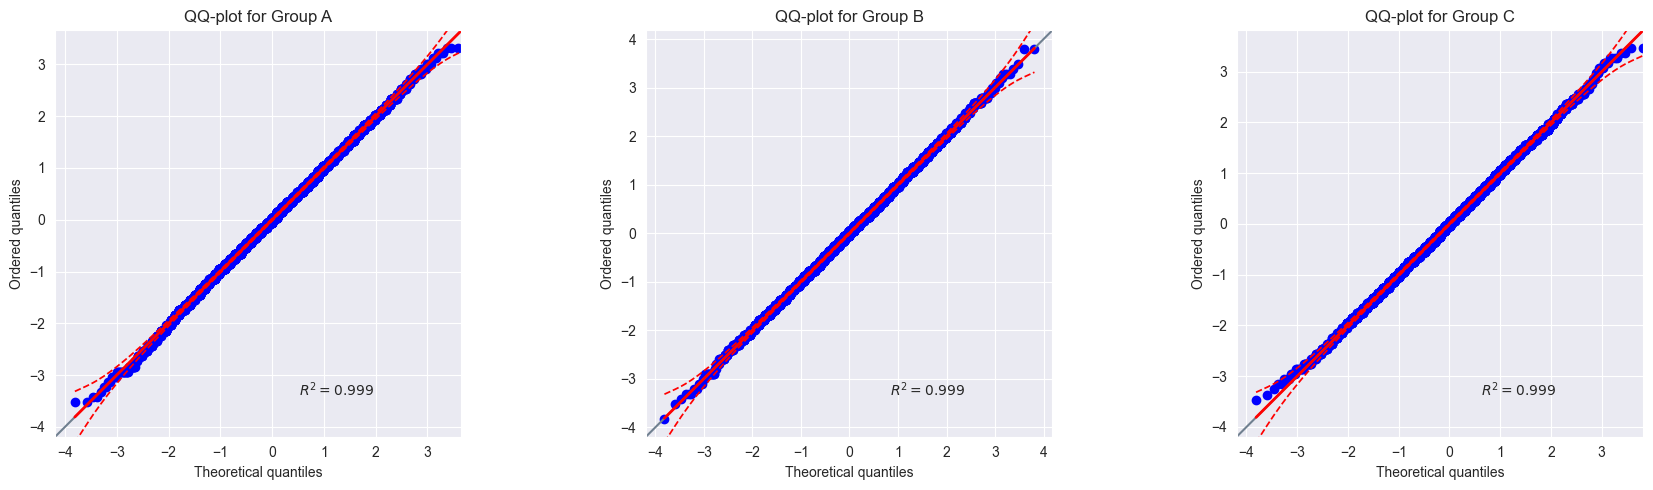

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

pingouin.qqplot(group_A.events, ax=axs[0])
axs[0].set_title('QQ-plot for Group A')

pingouin.qqplot(group_B.events, ax=axs[1])
axs[1].set_title('QQ-plot for Group B')

pingouin.qqplot(group_C.events, ax=axs[2])
axs[2].set_title('QQ-plot for Group C')

plt.tight_layout()
plt.show()

Данные в каждой группе показывают некоторые отклонения от теоретического нормального распределения, особенно на концах распределения

## ANOVA test

$H_{0}$: Средние значения всех групп равны

$H_{1}$: Средние значения по крайней мере в двух группах различаются

In [13]:
st.f_oneway(group_A.events, group_B.events, group_C.events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

На уровне значимости 0.05 средние значения по крайней мере в двух группах **различаются**

## Критерий Тьюки

In [14]:
pairwise_tukeyhsd(endog=df['events'], groups=df['group'], alpha=.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.0,7.7038,8.3642,True
A,C,-2.1093,0.0,-2.4395,-1.7791,True
B,C,-10.1433,0.0,-10.4735,-9.8131,True


Таким образом, статистически значимые различия существуют между всеми парами групп

## Выбор лучшей картинки

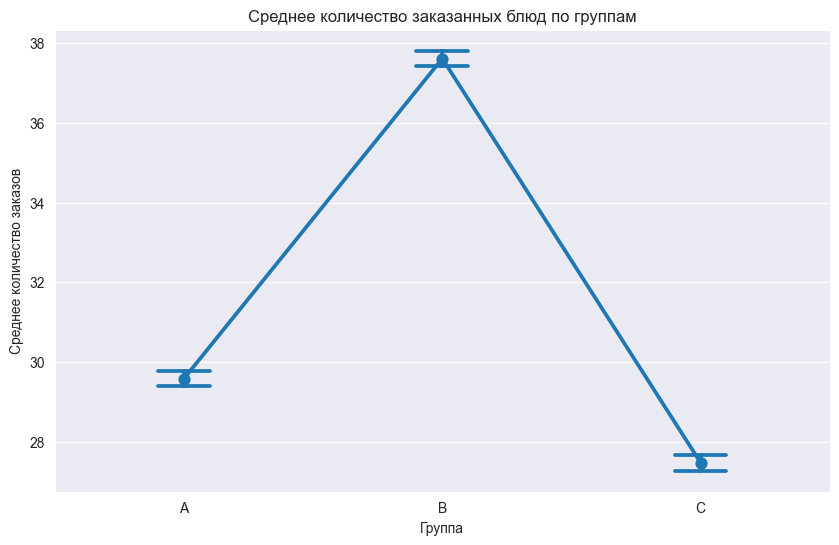

In [15]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='group', y='events', data=df, capsize=.2)
plt.title('Среднее количество заказанных блюд по группам')
plt.xlabel('Группа')
plt.ylabel('Среднее количество заказов')
plt.show()

Таким образом, исходя из графика следует, что стоит использовать квадратные (группа B) картинки.

## Выводы

### Научный стиль

Проведено исследование, цель которого заключалась в оценки влияния формата изображения на количество заказанных блюд в нашем сервисе.

Данные были разделены на три группы:
* Группа А - Прямоугольные изображения с соотношением сторон 16:9;
* Группа B - Квадратные изображения;
* Группа C - Прямоугольные изображения с соотношением сторон 12:4.

Предварительно данные были предобработаны. Проведены статистические тесты на равенство дисперсий между группами и нормальность по каждой группе. На уровне значимости 0.05 группы распределены нормально (p-value_A = 0.35; p-value_B = 0.66; p-value_C = 0.20) и обладают приблизительно равной дисперсией (p-value = 0.10).

Применение однофакторного дисперсионного анализа (ANOVA) показало статистически значимые различия между группами на уровне значимости 0.05 (p-value = 0.00).

Использование критерия Тьюки показало, что статистически значимые различия существуют между всеми парами групп.

Визуальная оценка данных с использованием точечного графика (point plot) показала, что группа B (квадратные изображения) имеет наибольшее среднее количество заказов. В результате, предпочтение следует отдать использованию квадратных изображений для увеличения количества заказов.

### Научно-популярный стиль

Проведено исследование, цель которого заключалась в том, чтобы выяснить, как формат изображений влияет на количество заказов в нашем сервисе. Для этого мы разделили наши фотографии на три типа:

* Прямоугольные с широким форматом.
* Квадратные.
* Прямоугольные, но более узкие и длинные.

Данные были тщательно проверены и подготовлены для анализа. Затем были использованы специальные методы для сравнения количества заказов, сделанных при каждом типе изображений.

Результатом стал тот факт, что формат изображений действительно влияет на количество заказов. Причем квадратные изображения привлекли больше заказов, чем остальные форматы.

Таким образом, если мы хотим увеличить количество заказов, нам стоит использовать больше квадратных изображений в нашем сервисе.